Import bibliotek

In [1]:
import csv
import math
import numpy as np
from matplotlib import pyplot as plt


Improt pliku measurements.csv

In [95]:
with open('./measurements.csv', 'r') as f:
    csvreader = csv.reader(f, delimiter=',')
    data = [row for row in csvreader]
    data = np.array(data, dtype=np.float32)

x = data[:, 0]
y = data[:, 1]

theta_0: 0.006487626295089722, theta_1: 0.3153841448974609, J cost: 0.6391740798950195


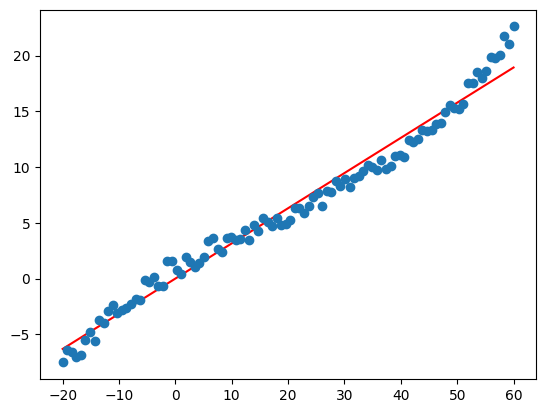

In [8]:
def h_fun(x, theta_0, theta_1):
    return theta_0 + theta_1*x

def calculate_cost(x , y, theta_0, theta_1):
    m = len(x)
    h = h_fun(x, theta_0, theta_1)
    return (1/(2*m)) * np.sum(np.square(h - y))

eps = 1e-5
alpha = 0.001
theta_0 = 0
theta_1 = 0
m = len(x)
cost_prev = 1000
cost = calculate_cost(x, y, theta_0, theta_1)

while cost_prev - cost > eps:
    cost_prev = cost
    h = h_fun(x, theta_0, theta_1)
    theta_0 -= alpha * (1/m) * np.sum(h - y)
    theta_1 -= alpha * (1/m) * np.sum((h - y)*x)
    cost = calculate_cost(x, y, theta_0, theta_1)

print(f'theta_0: {theta_0}, theta_1: {theta_1}, J cost: {cost}')
plt.plot(x, h_fun(x, theta_0, theta_1), 'r')
plt.plot(x, y, 'o')

Regresja liniowa wielu zmiennych

In [6]:
with open('./housing.txt', 'r') as f:
    csvreader = csv.reader(f, delimiter=',')
    data2 = [row for row in csvreader]
    data2 = np.array(data2, dtype=np.float32)
    y = data2[:, 2]
    y.shape = [1, y.shape[0]]
    X = data2[:, 0:2]
    X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1).T

y_scale = y.max()
y = y / y_scale

X_scale = X.max(axis=1)
X_scale.shape = [-1, 1]
X = X / X_scale

def h_fun(X, theta):
    return theta.T @ X

def calculate_cost(X, y, theta):
    m = X.shape[1]
    h = h_fun(X, theta)
    return (1/(2*m)) * np.sum(np.power(h - y, 2))

eps = 1e-5
alpha = 0.001
theta = np.array([[0],[0],[0]])
m = X.shape[1]
cost_prev = 1000

while True:
    cost = calculate_cost(X, y, theta)
    h = h_fun(X,theta)
    h_y_diff = (h_fun(X, theta) - y)
    gradient = h_y_diff @ X.T
    theta = theta - alpha*gradient.T / m
    if cost_prev - cost <= eps: 
        break
    cost_prev = cost

example = np.array([[1], [1300], [4]])
h_example = theta.T @ (example/X_scale) * y_scale
print(f'koszt nieruchomosi o pow. {example[1][0]} z l. pok. {example[2][0]} oszacowany na {h_example[0][0]}')

koszt nieruchomosi o pow. 1300 z l. pok. 4 oszacowany na 296177.8095261862


Regresja nieliniowa

In [68]:
with open('./measurements.csv', 'r') as f:
    csvreader = csv.reader(f, delimiter=',')
    data = [row for row in csvreader]
    data = np.array(data, dtype=np.float32)

x = data[:, 0]
y = data[:, 1]

X = np.vstack([np.ones(x.shape), x, x**2, x**3])

X_scale = X.max(axis=1)
X_scale.shape = [-1, 1]
X = X / X_scale
 
y.shape = [1, -1]
y_scale = y.max()
y = y / y_scale

eps = 1e-10
alpha = 1e-3
theta = np.array([[0], [0], [0], [0]])

def h_fun(X, theta):
    return theta.T @ X

def calculate_cost(X, y, theta):
    m = y.size
    h = h_fun(X, theta)
    return (1/(2*m)) * np.sum(np.power(h - y,2))

y.shape = (1, 100)
X.shape = (4, 100)
theta.shape = (4, 1)
m = y.size
cost_prev = 1000
cost = calculate_cost(X, y, theta)

while True:
    cost = calculate_cost(X, y, theta)
    h = h_fun(X,theta)
    h_y_diff = (h_fun(X, theta) - y)
    gradient = h_y_diff @ X.T
    theta = theta - alpha*gradient.T / m
    if cost_prev - cost <= eps: 
        break
    cost_prev = cost

print(theta)


[[ 0.02528659]
 [ 0.77921904]
 [-0.49718106]
 [ 0.65075701]]


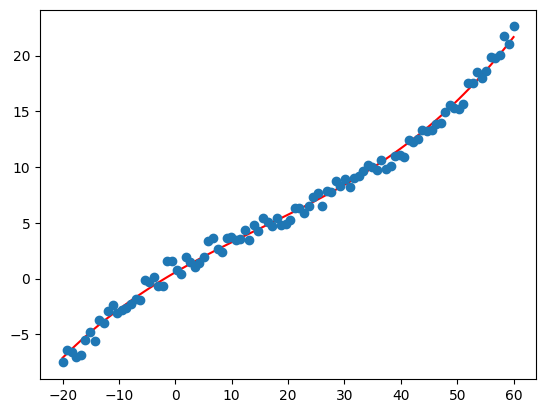

In [106]:
plt.plot(x, (h_fun(X,theta)*y_scale).T, '-r')
plt.plot(x, y, 'o')